In [1]:
%matplotlib inline
%pylab inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('parallel_merge_min.csv', names=['k','node','number_influenced','s'])

In [3]:
MIN_V_VALUE = 1
MAX_V_VALUE = 4158
BORDER = 50

In [4]:
index_value = df[['node']].sort_values(by='node').drop_duplicates().reset_index(drop=True).to_dict('index')
node_mapper = {v['node']: k for k, v in index_value.items()}
df['node'] = df['node'].apply(lambda x: node_mapper[x])
df.head()

,k,node,number_influenced,s
0,0,3909,1,0
1,1,3909,5,0
2,2,3909,23,0
3,3,3909,97,0
4,4,3909,451,0


In [5]:
df.groupby(['node','s'], sort=False)['k'].max()
idx = df.groupby(['node','s'])['k'].transform(max) == df['k']

In [6]:
df_sub_sample = df[idx][['node','number_influenced','s']]

In [7]:
df_sub_sample = df_sub_sample.reset_index(drop=True)
df_sub_sample.head()

,node,number_influenced,s
0,3909,4158,0
1,3909,4158,1
2,3909,4158,2
3,3909,4158,3
4,3909,4158,4


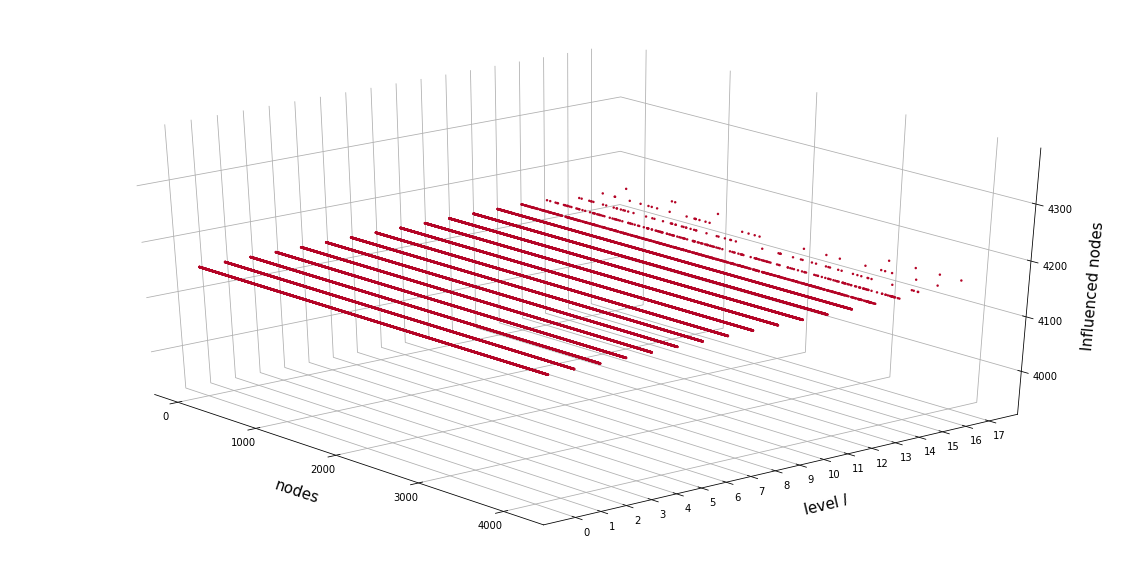

In [8]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sub_sample['node'],
           df_sub_sample['s'],
           df_sub_sample['number_influenced'],
           c=df_sub_sample['number_influenced'],
           linewidth=0,
           s=6, 
           cmap=cm.coolwarm, depthshade=False,
           vmin=MIN_V_VALUE,
           vmax=MAX_V_VALUE)

matplotlib.pyplot.yticks(range(0, 18))

ax.set_xlabel('nodes', fontsize=15)
ax.set_ylabel(r'level $\it{l}$', fontsize=15)
ax.set_zlabel('Influenced nodes', fontsize=15)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 10

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.view_init(30, -40)

plt.show()

In [9]:
count_s = df_sub_sample[['s','node']].groupby(['s'], as_index=False).count().sort_values(by=['s'])

In [10]:
y_second_label = []
y_second_label.append('')
for r in count_s['node']:
    y_second_label.append('{}'.format(r))
    
y_second_label.append(r'$\sum$')

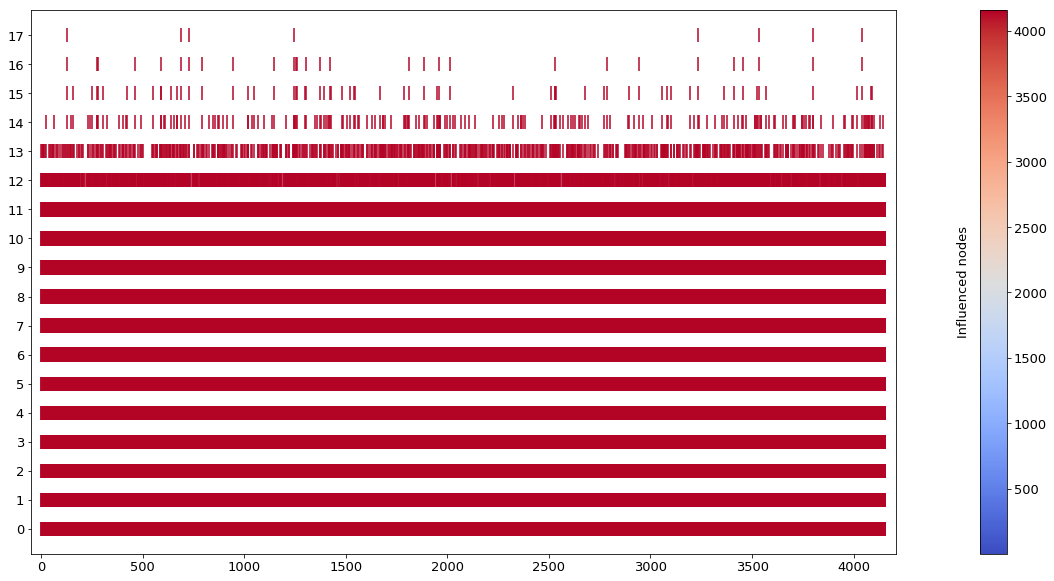

In [12]:
import matplotlib.pyplot as plt
from numpy.random import rand
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

fig, ax = plt.subplots(figsize=(20, 10))
sc = ax.scatter(df_sub_sample['node'], 
                df_sub_sample['s'],
                c=df_sub_sample['number_influenced'],
                cmap=cm.coolwarm, 
                s=200, 
                marker='|',
                vmin=MIN_V_VALUE,
                vmax=MAX_V_VALUE)

matplotlib.pyplot.yticks(range(0, 18))
matplotlib.pyplot.xlim(xmin=-BORDER)
matplotlib.pyplot.xlim(xmax=MAX_V_VALUE + BORDER)

#ax.set_xlabel('nodes', fontsize=15)
#ax.set_ylabel(r'level $\it{l}$', fontsize=16)

#plt.title('Linear Threshold Rank: arvix - min', fontsize=15)

cbar = plt.colorbar(sc, pad=0.075)
cbar.ax.set_ylabel('Influenced nodes', rotation=90,  labelpad=-90, fontsize=13)

#ax2 = ax.twinx()
#ax2.set_yticks(range(0, 20))
#ax2.set_yticklabels(y_second_label)

plt.show()